**This file is authored by Shatakshi Raman, and is used for data cleaning purposes**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hate And aggression Detection/agr_en_train.csv')
df.head()


,Comments,level
0,Well said sonu..you have courage to stand agai...,2
1,"Most of Private Banks ATM's Like HDFC, ICICI e...",0
2,"Now question is, Pakistan will adhere to this?",2
3,Pakistan is comprised of fake muslims who does...,2
4,"??we r against cow slaughter,so of course it w...",0


In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

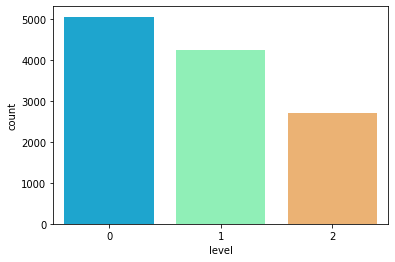

In [ ]:

sns.countplot(x = 'level', data = df, palette = 'rainbow')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Comments_punct'] = df['Comments'].apply(lambda x: remove_punct(x))
df.head(10)

,Comments,level,Comments_punct
0,Well said sonu..you have courage to stand against dadagiri of Muslims,2,Well said sonuyou have courage to stand against dadagiri of Muslims
1,"Most of Private Banks ATM's Like HDFC, ICICI etc are out of cash. Only Public sector bank's ATM ...",0,Most of Private Banks ATMs Like HDFC ICICI etc are out of cash Only Public sector banks ATM working
2,"Now question is, Pakistan will adhere to this?",2,Now question is Pakistan will adhere to this
3,Pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...,2,Pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...
4,"??we r against cow slaughter,so of course it will stop leather manufacturing if it happens.",0,we r against cow slaughterso of course it will stop leather manufacturing if it happens
5,Wondering why Educated Ambassador is struggling to pay through Credit/Debit at a Decent Restaura...,1,Wondering why Educated Ambassador is struggling to pay through CreditDebit at a Decent Restauran...
6,How does inflation react to all the after shocks of this demon...?,0,How does inflation react to all the after shocks of this demon
7,Not good job.....this guis creating a problem n our socacity,1,Not good jobthis guis creating a problem n our socacity
8,This is a false news Indian media is simply misguiding there nation and creating hatred..Media s...,0,This is a false news Indian media is simply misguiding there nation and creating hatredMedia sho...
9,"no permanent foes, no permanent friends. interest is permanent !",0,no permanent foes no permanent friends interest is permanent


In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Comments_tokenized'] = df['Comments_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,Comments,level,Comments_punct,Comments_tokenized
0,Well said sonu..you have courage to stand against dadagiri of Muslims,2,Well said sonuyou have courage to stand against dadagiri of Muslims,"[well, said, sonuyou, have, courage, to, stand, against, dadagiri, of, muslims]"
1,"Most of Private Banks ATM's Like HDFC, ICICI etc are out of cash. Only Public sector bank's ATM ...",0,Most of Private Banks ATMs Like HDFC ICICI etc are out of cash Only Public sector banks ATM working,"[most, of, private, banks, atms, like, hdfc, icici, etc, are, out, of, cash, only, public, secto..."
2,"Now question is, Pakistan will adhere to this?",2,Now question is Pakistan will adhere to this,"[now, question, is, pakistan, will, adhere, to, this]"
3,Pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...,2,Pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...,"[pakistan, is, comprised, of, fake, muslims, who, does, not, know, the, meaning, of, unity, and,..."
4,"??we r against cow slaughter,so of course it will stop leather manufacturing if it happens.",0,we r against cow slaughterso of course it will stop leather manufacturing if it happens,"[we, r, against, cow, slaughterso, of, course, it, will, stop, leather, manufacturing, if, it, h..."


In [ ]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
stopword = nltk.corpus.stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Comments_nonstop'] = df['Comments_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,Comments,level,Comments_punct,Comments_tokenized,Comments_nonstop
0,Well said sonu..you have courage to stand against dadagiri of Muslims,2,Well said sonuyou have courage to stand against dadagiri of Muslims,"[well, said, sonuyou, have, courage, to, stand, against, dadagiri, of, muslims]","[well, said, sonuyou, courage, stand, dadagiri, muslims]"
1,"Most of Private Banks ATM's Like HDFC, ICICI etc are out of cash. Only Public sector bank's ATM ...",0,Most of Private Banks ATMs Like HDFC ICICI etc are out of cash Only Public sector banks ATM working,"[most, of, private, banks, atms, like, hdfc, icici, etc, are, out, of, cash, only, public, secto...","[private, banks, atms, like, hdfc, icici, etc, cash, public, sector, banks, atm, working]"
2,"Now question is, Pakistan will adhere to this?",2,Now question is Pakistan will adhere to this,"[now, question, is, pakistan, will, adhere, to, this]","[question, pakistan, adhere]"
3,Pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...,2,Pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...,"[pakistan, is, comprised, of, fake, muslims, who, does, not, know, the, meaning, of, unity, and,...","[pakistan, comprised, fake, muslims, know, meaning, unity, imposes, thoughts, othersall, rascals..."
4,"??we r against cow slaughter,so of course it will stop leather manufacturing if it happens.",0,we r against cow slaughterso of course it will stop leather manufacturing if it happens,"[we, r, against, cow, slaughterso, of, course, it, will, stop, leather, manufacturing, if, it, h...","[r, cow, slaughterso, course, stop, leather, manufacturing, happens]"
5,Wondering why Educated Ambassador is struggling to pay through Credit/Debit at a Decent Restaura...,1,Wondering why Educated Ambassador is struggling to pay through CreditDebit at a Decent Restauran...,"[wondering, why, educated, ambassador, is, struggling, to, pay, through, creditdebit, at, a, dec...","[wondering, educated, ambassador, struggling, pay, creditdebit, decent, restaurant, cant, imagin..."
6,How does inflation react to all the after shocks of this demon...?,0,How does inflation react to all the after shocks of this demon,"[how, does, inflation, react, to, all, the, after, shocks, of, this, demon]","[inflation, react, shocks, demon]"
7,Not good job.....this guis creating a problem n our socacity,1,Not good jobthis guis creating a problem n our socacity,"[not, good, jobthis, guis, creating, a, problem, n, our, socacity]","[good, jobthis, guis, creating, problem, n, socacity]"
8,This is a false news Indian media is simply misguiding there nation and creating hatred..Media s...,0,This is a false news Indian media is simply misguiding there nation and creating hatredMedia sho...,"[this, is, a, false, news, indian, media, is, simply, misguiding, there, nation, and, creating, ...","[false, news, indian, media, simply, misguiding, nation, creating, hatredmedia, v, careful, spre..."
9,"no permanent foes, no permanent friends. interest is permanent !",0,no permanent foes no permanent friends interest is permanent,"[no, permanent, foes, no, permanent, friends, interest, is, permanent, ]","[permanent, foes, permanent, friends, interest, permanent, ]"


In [ ]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Comments_stemmed'] = df['Comments_nonstop'].apply(lambda x: stemming(x))
df.head()

,Comments,level,Comments_punct,Comments_tokenized,Comments_nonstop,Comments_stemmed
0,Well said sonu..you have courage to stand against dadagiri of Muslims,2,Well said sonuyou have courage to stand against dadagiri of Muslims,"[well, said, sonuyou, have, courage, to, stand, against, dadagiri, of, muslims]","[well, said, sonuyou, courage, stand, dadagiri, muslims]","[well, said, sonuy, courag, stand, dadagiri, muslim]"
1,"Most of Private Banks ATM's Like HDFC, ICICI etc are out of cash. Only Public sector bank's ATM ...",0,Most of Private Banks ATMs Like HDFC ICICI etc are out of cash Only Public sector banks ATM working,"[most, of, private, banks, atms, like, hdfc, icici, etc, are, out, of, cash, only, public, secto...","[private, banks, atms, like, hdfc, icici, etc, cash, public, sector, banks, atm, working]","[privat, bank, atm, like, hdfc, icici, etc, cash, public, sector, bank, atm, work]"
2,"Now question is, Pakistan will adhere to this?",2,Now question is Pakistan will adhere to this,"[now, question, is, pakistan, will, adhere, to, this]","[question, pakistan, adhere]","[question, pakistan, adher]"
3,Pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...,2,Pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...,"[pakistan, is, comprised, of, fake, muslims, who, does, not, know, the, meaning, of, unity, and,...","[pakistan, comprised, fake, muslims, know, meaning, unity, imposes, thoughts, othersall, rascals...","[pakistan, compris, fake, muslim, know, mean, uniti, impos, thought, othersal, rascal, gather]"
4,"??we r against cow slaughter,so of course it will stop leather manufacturing if it happens.",0,we r against cow slaughterso of course it will stop leather manufacturing if it happens,"[we, r, against, cow, slaughterso, of, course, it, will, stop, leather, manufacturing, if, it, h...","[r, cow, slaughterso, course, stop, leather, manufacturing, happens]","[r, cow, slaughterso, cours, stop, leather, manufactur, happen]"


In [ ]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['cleaned'] = df['Comments_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,Comments,level,Comments_punct,Comments_tokenized,Comments_nonstop,Comments_stemmed,cleaned
0,Well said sonu..you have courage to stand against dadagiri of Muslims,2,Well said sonuyou have courage to stand against dadagiri of Muslims,"[well, said, sonuyou, have, courage, to, stand, against, dadagiri, of, muslims]","[well, said, sonuyou, courage, stand, dadagiri, muslims]","[well, said, sonuy, courag, stand, dadagiri, muslim]","[well, said, sonuyou, courage, stand, dadagiri, muslim]"
1,"Most of Private Banks ATM's Like HDFC, ICICI etc are out of cash. Only Public sector bank's ATM ...",0,Most of Private Banks ATMs Like HDFC ICICI etc are out of cash Only Public sector banks ATM working,"[most, of, private, banks, atms, like, hdfc, icici, etc, are, out, of, cash, only, public, secto...","[private, banks, atms, like, hdfc, icici, etc, cash, public, sector, banks, atm, working]","[privat, bank, atm, like, hdfc, icici, etc, cash, public, sector, bank, atm, work]","[private, bank, atm, like, hdfc, icici, etc, cash, public, sector, bank, atm, working]"
2,"Now question is, Pakistan will adhere to this?",2,Now question is Pakistan will adhere to this,"[now, question, is, pakistan, will, adhere, to, this]","[question, pakistan, adhere]","[question, pakistan, adher]","[question, pakistan, adhere]"
3,Pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...,2,Pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...,"[pakistan, is, comprised, of, fake, muslims, who, does, not, know, the, meaning, of, unity, and,...","[pakistan, comprised, fake, muslims, know, meaning, unity, imposes, thoughts, othersall, rascals...","[pakistan, compris, fake, muslim, know, mean, uniti, impos, thought, othersal, rascal, gather]","[pakistan, comprised, fake, muslim, know, meaning, unity, imposes, thought, othersall, rascal, g..."
4,"??we r against cow slaughter,so of course it will stop leather manufacturing if it happens.",0,we r against cow slaughterso of course it will stop leather manufacturing if it happens,"[we, r, against, cow, slaughterso, of, course, it, will, stop, leather, manufacturing, if, it, h...","[r, cow, slaughterso, course, stop, leather, manufacturing, happens]","[r, cow, slaughterso, cours, stop, leather, manufactur, happen]","[r, cow, slaughterso, course, stop, leather, manufacturing, happens]"


In [ ]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['Comments'])
print('{} Number of Comments has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

12000 Number of Comments has 18322 words


In [ ]:
df.to_excel(r'C:\Users\Shatakshi\Desktop\Hate Detection\cleaned_datasets\cleaned_agr_en.xlsx')

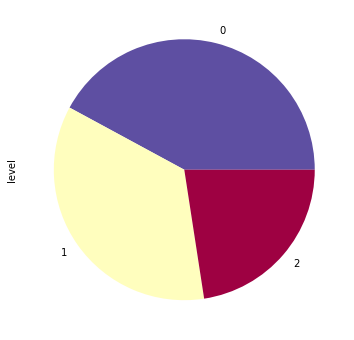

In [ ]:
countdf = df['level'].value_counts()
countdf.reset_index().head()
countdf.plot(kind='pie', colormap='Spectral_r', figsize=(6, 6))

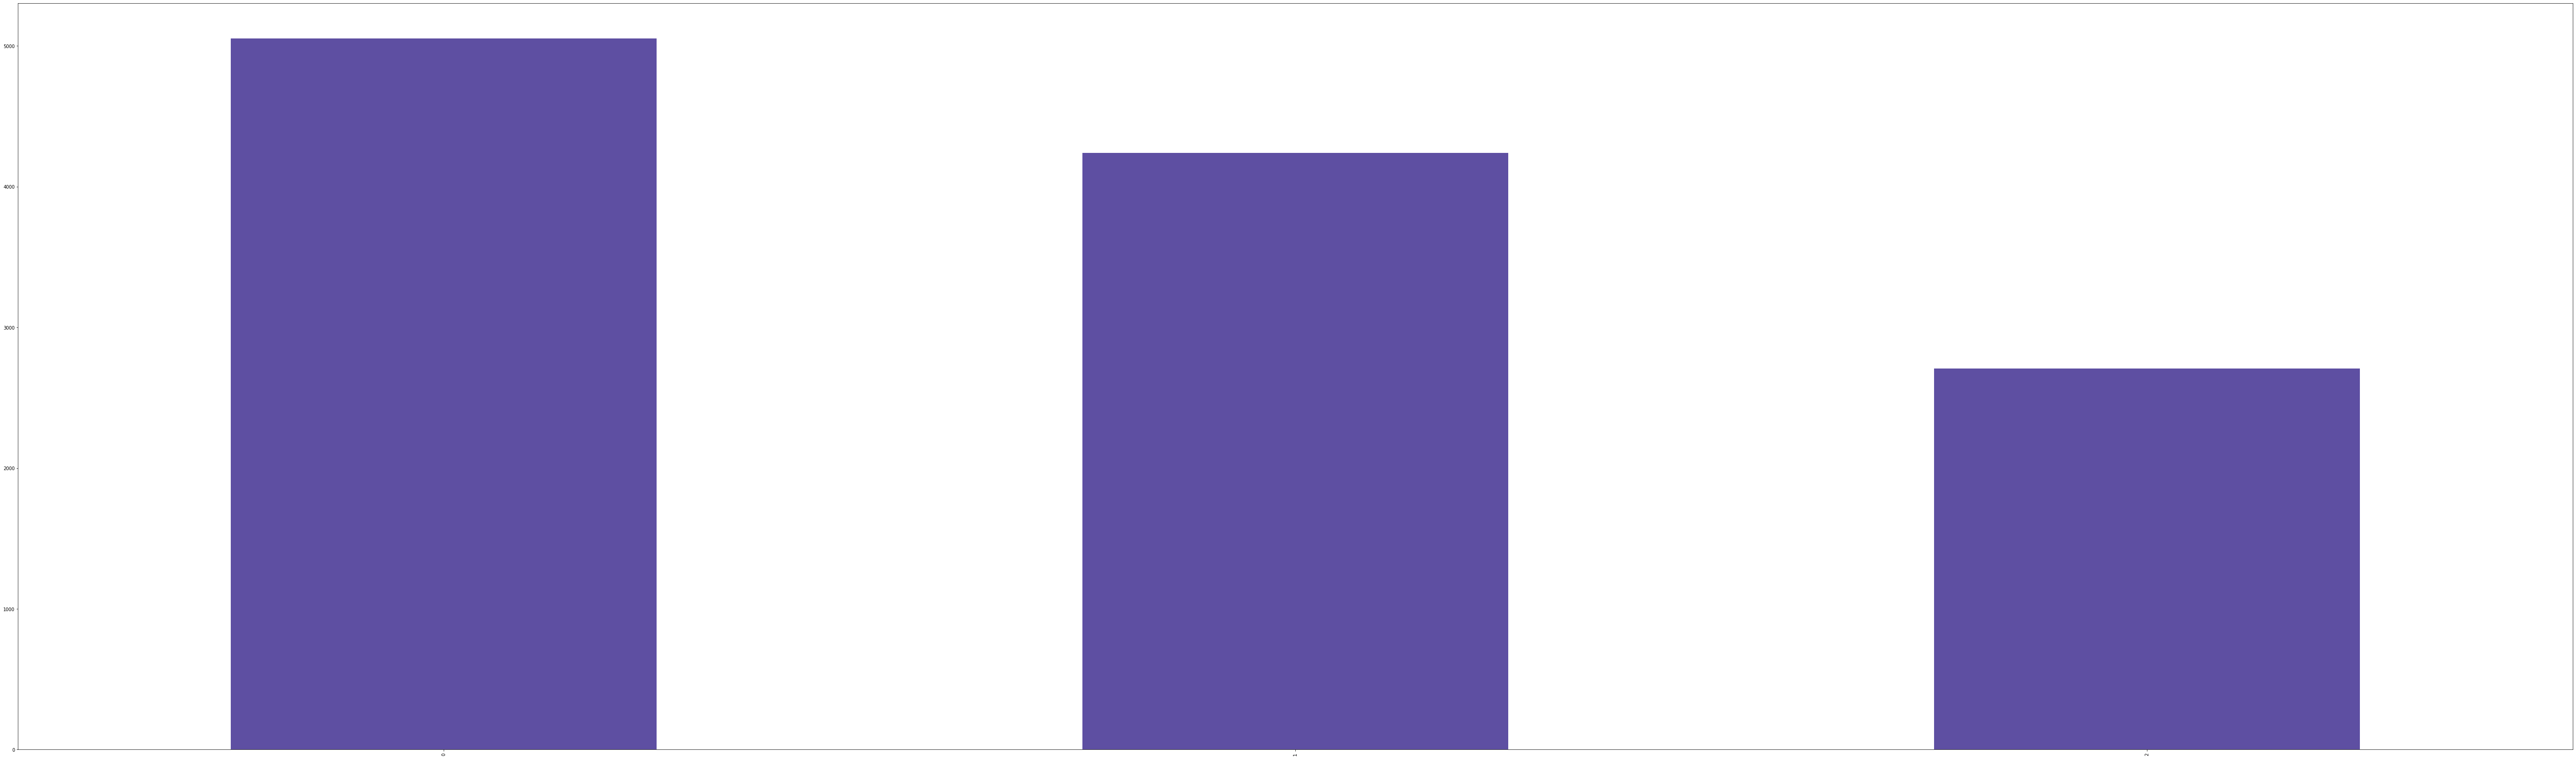

In [ ]:

countdf.plot(kind='bar', colormap='Spectral_r', figsize=(100, 30))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'level'), Text(0.5, 0, 'Count')]

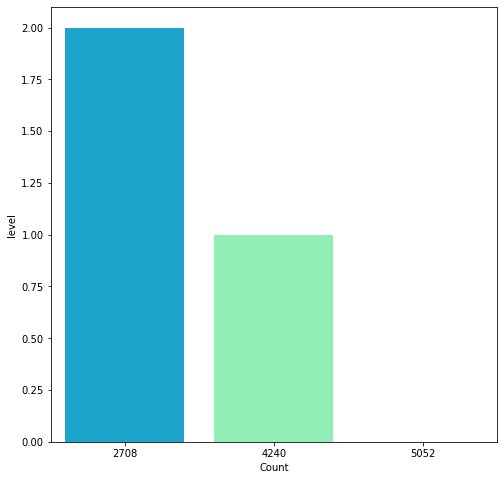

In [ ]:
labels = df['level'].value_counts().index
val = df['level'].value_counts().values

plt.figure(figsize = (8,8))
ax = sns.barplot(val,labels, palette= 'rainbow')
ax.set(xlabel = 'Count',ylabel = 'level')

In [ ]:
df['Comments'] = df['Comments'].str.lower()
df.head()

,Comments,level,Comments_punct,Comments_tokenized,Comments_nonstop,Comments_stemmed,cleaned
0,well said sonu..you have courage to stand against dadagiri of muslims,2,Well said sonuyou have courage to stand against dadagiri of Muslims,"[well, said, sonuyou, have, courage, to, stand, against, dadagiri, of, muslims]","[well, said, sonuyou, courage, stand, dadagiri, muslims]","[well, said, sonuy, courag, stand, dadagiri, muslim]","[well, said, sonuyou, courage, stand, dadagiri, muslim]"
1,"most of private banks atm's like hdfc, icici etc are out of cash. only public sector bank's atm ...",0,Most of Private Banks ATMs Like HDFC ICICI etc are out of cash Only Public sector banks ATM working,"[most, of, private, banks, atms, like, hdfc, icici, etc, are, out, of, cash, only, public, secto...","[private, banks, atms, like, hdfc, icici, etc, cash, public, sector, banks, atm, working]","[privat, bank, atm, like, hdfc, icici, etc, cash, public, sector, bank, atm, work]","[private, bank, atm, like, hdfc, icici, etc, cash, public, sector, bank, atm, working]"
2,"now question is, pakistan will adhere to this?",2,Now question is Pakistan will adhere to this,"[now, question, is, pakistan, will, adhere, to, this]","[question, pakistan, adhere]","[question, pakistan, adher]","[question, pakistan, adhere]"
3,pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...,2,Pakistan is comprised of fake muslims who does not know the meaning of unity and imposes their t...,"[pakistan, is, comprised, of, fake, muslims, who, does, not, know, the, meaning, of, unity, and,...","[pakistan, comprised, fake, muslims, know, meaning, unity, imposes, thoughts, othersall, rascals...","[pakistan, compris, fake, muslim, know, mean, uniti, impos, thought, othersal, rascal, gather]","[pakistan, comprised, fake, muslim, know, meaning, unity, imposes, thought, othersall, rascal, g..."
4,"??we r against cow slaughter,so of course it will stop leather manufacturing if it happens.",0,we r against cow slaughterso of course it will stop leather manufacturing if it happens,"[we, r, against, cow, slaughterso, of, course, it, will, stop, leather, manufacturing, if, it, h...","[r, cow, slaughterso, course, stop, leather, manufacturing, happens]","[r, cow, slaughterso, cours, stop, leather, manufactur, happen]","[r, cow, slaughterso, course, stop, leather, manufacturing, happens]"


**THIS PART IS FOR LOW RESOURCE MODEL TRAINING**

In [ ]:
import re
import nltk
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sn
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
stemmer=PorterStemmer()

nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
level = df['level'].unique()
print(level)

[2 0 1]


In [ ]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['cleaned'].values.astype('U'))
final_features.shape

ValueError: ignored